# 6.5 Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Assign path variable
path = '/Users/mariamaske/World Happiness Data!/02 Data/Prepared Data'

In [4]:
# loading dataframe
# Join path Happiness_data_complete.csv
df = pd.read_csv(os.path.join(path,'Happiness_data_after_exploring.csv'), index_col = False)

### Data cleaning 

In [5]:
df.shape

(1297, 17)

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Country,Region,Happiness Score,Logged GDP per capita,Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Year,Happiness Rank,Happiness Score category,Year_loc
0,0,152,Afghanistan,South Asia,3.575,7.556315,49.680115,0.319821,0.302853,0.303354,0.234138,0.365104,0.097188,2015,153,Low Happiness Score,Vor Corona
1,1,304,Afghanistan,South Asia,3.360,7.497288,49.871265,0.382266,0.110368,0.173436,0.164305,0.312680,0.071116,2016,149,Low Happiness Score,Vor Corona
2,2,442,Afghanistan,South Asia,3.794,7.497288,49.871265,0.401000,0.582000,0.181000,0.106000,0.312000,0.061000,2017,137,Low Happiness Score,Vor Corona
3,3,591,Afghanistan,South Asia,3.632,7.460144,52.339527,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000,2018,145,Low Happiness Score,Vor Corona
4,4,747,Afghanistan,South Asia,3.203,7.494588,52.599998,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000,2019,147,Low Happiness Score,Vor Corona


In [7]:
#Dropping non-numerical columns
df_num = df.drop(columns=['Country','Year','Unnamed: 0','Unnamed: 0.1','Region', 'Happiness Rank', 'Year_loc', 'Happiness Score category'])

In [8]:
df_num.head()

,Happiness Score,Logged GDP per capita,Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,3.575,7.556315,49.680115,0.319821,0.302853,0.303354,0.234138,0.365104,0.097188
1,3.360,7.497288,49.871265,0.382266,0.110368,0.173436,0.164305,0.312680,0.071116
2,3.794,7.497288,49.871265,0.401000,0.582000,0.181000,0.106000,0.312000,0.061000
3,3.632,7.460144,52.339527,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000
4,3.203,7.494588,52.599998,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000


In [10]:
# Check for missing values

df_num.isnull().sum()

Happiness Score                                 0
Logged GDP per capita                         198
Healthy life expectancy                       178
Explained by: Log GDP per capita                0
Explained by: Social support                    0
Explained by: Healthy life expectancy           0
Explained by: Freedom to make life choices      0
Explained by: Generosity                        0
Explained by: Perceptions of corruption         0
dtype: int64

## Standardizing data: Z-Score

In [11]:
df_num['Happiness Score'] = (df_num['Happiness Score'] - df_num['Happiness Score'].mean()) / df_num['Happiness Score'].std()


In [12]:
df_num['Healthy life expectancy'] = (df_num['Healthy life expectancy'] - df_num['Healthy life expectancy'].mean()) / df_num['Healthy life expectancy'].std()


In [13]:
df_num['Explained by: Log GDP per capita'] = (df_num['Explained by: Log GDP per capita'] - df_num['Explained by: Log GDP per capita'].mean()) / df_num['Explained by: Log GDP per capita'].std()


In [14]:
df_num['Logged GDP per capita'] = (df_num['Logged GDP per capita'] - df_num['Logged GDP per capita'].mean()) / df_num['Logged GDP per capita'].std()


In [15]:
df_num['Explained by: Social support'] = (df_num['Explained by: Social support'] - df_num['Explained by: Social support'].mean()) / df_num['Explained by: Social support'].std()


In [16]:
df_num['Explained by: Healthy life expectancy'] = (df_num['Explained by: Healthy life expectancy'] - df_num['Explained by: Healthy life expectancy'].mean()) / df_num['Explained by: Healthy life expectancy'].std()

In [17]:
df_num['Explained by: Freedom to make life choices'] = (df_num['Explained by: Freedom to make life choices'] - df_num['Explained by: Freedom to make life choices'].mean()) / df_num['Explained by: Freedom to make life choices'].std()

In [18]:
df_num['Explained by: Generosity'] = (df_num['Explained by: Generosity'] - df_num['Explained by: Generosity'].mean()) / df_num['Explained by: Generosity'].std()


In [19]:
df_num['Explained by: Perceptions of corruption'] = (df_num['Explained by: Perceptions of corruption'] - df_num['Explained by: Perceptions of corruption'].mean()) / df_num['Explained by: Perceptions of corruption'].std()


In [20]:
df_num.head()

,Happiness Score,Logged GDP per capita,Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,-1.715216,-1.499656,-1.917764,-1.585042,-2.315470,-1.189984,-1.409666,1.457246,-0.307128
1,-1.909436,-1.549557,-1.891926,-1.444170,-2.906799,-1.725205,-1.858646,0.999895,-0.537651
2,-1.517383,-1.549557,-1.891926,-1.401906,-1.457908,-1.694044,-2.233506,0.993964,-0.627097
3,-1.663726,-1.580958,-1.558279,-1.557566,-1.596151,-1.389188,-2.368522,-0.061650,-0.848141
4,-2.051261,-1.551840,-1.523069,-1.516959,-1.657593,-0.952502,-2.915014,-0.349545,-0.945401


In [30]:
# drops the rows with missing values, otherwise we can't use the following model
df_num2 = df_num.dropna(axis=0)

In [31]:
df_num2.isnull().sum()

Happiness Score                               0
Logged GDP per capita                         0
Healthy life expectancy                       0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

## 2. Elbow technique

In [33]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [34]:
score = [kmeans[i].fit(df_num2).score(df_num2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/mariamaske/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariamaske/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariamaske/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariamaske/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[-9659.909794880441,
 -5955.0779910892625,
 -4529.754603095276,
 -4019.7741074285277,
 -3595.7871810419774,
 -3414.4066276092763,
 -3251.002268590411,
 -3098.2320970114733,
 -2977.3920753851967]

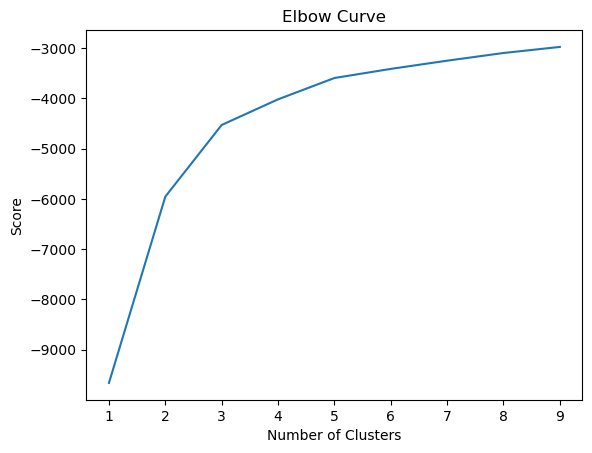

In [35]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### How many clusters do I choose?
I will choose 5 cluster because the curve rises very sharply to 3 and then gets another push to 5 before it continues very smoothly to 9.

## 3. k-means clustering

In [36]:
kmeans = KMeans(n_clusters = 5)

In [38]:
# Fit the k-means object to the data.

kmeans.fit(df_num2)

/Users/mariamaske/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [42]:
#Attaching a new column 'clusters'
df_num2['clusters'] = kmeans.fit_predict(df_num2)

/Users/mariamaske/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/q1/d0sf9cv50yb2q64wy681zzzh0000gn/T/ipykernel_5110/2916104547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num2['clusters'] = kmeans.fit_predict(df_num2)


In [43]:
df_num2.head()

,Happiness Score,Logged GDP per capita,Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,clusters
0,-1.715216,-1.499656,-1.917764,-1.585042,-2.315470,-1.189984,-1.409666,1.457246,-0.307128,4
1,-1.909436,-1.549557,-1.891926,-1.444170,-2.906799,-1.725205,-1.858646,0.999895,-0.537651,4
2,-1.517383,-1.549557,-1.891926,-1.401906,-1.457908,-1.694044,-2.233506,0.993964,-0.627097,4
3,-1.663726,-1.580958,-1.558279,-1.557566,-1.596151,-1.389188,-2.368522,-0.061650,-0.848141,4
4,-2.051261,-1.551840,-1.523069,-1.516959,-1.657593,-0.952502,-2.915014,-0.349545,-0.945401,4


In [44]:
#Calculating number of data points in each cluster
df_num2['clusters'].value_counts()

3    306
4    258
0    217
2    162
1    155
Name: clusters, dtype: int64

### Plotting clusters

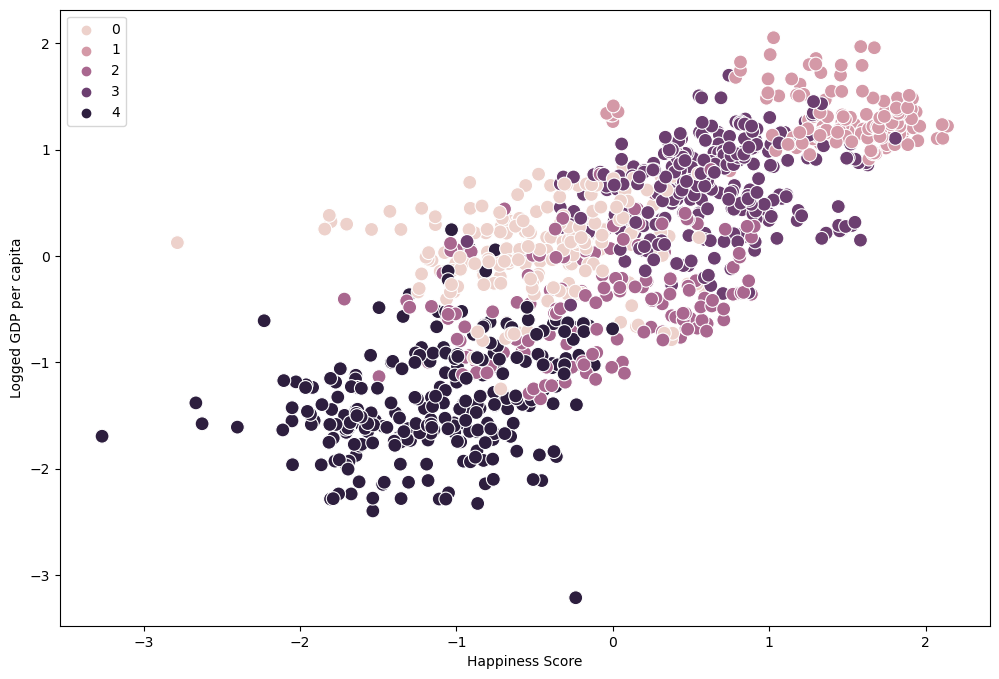

In [47]:
# Plot the clusters for the "Health (Life Expectancy)" and "Trust (Government Corruption)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num2['Happiness Score'], y=df_num2['Logged GDP per capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Logged GDP per capita') # Label y-axis.
plt.show()

#### Observation:
The cluster shows us that there is a a slight significant correlation between the factors Logged GDP per capita and Happiness score. But there is also variance. Therefore we can assume that a high Logged GDP per capita affects the happiness score positiv but can't explain completly the high and low scores. 

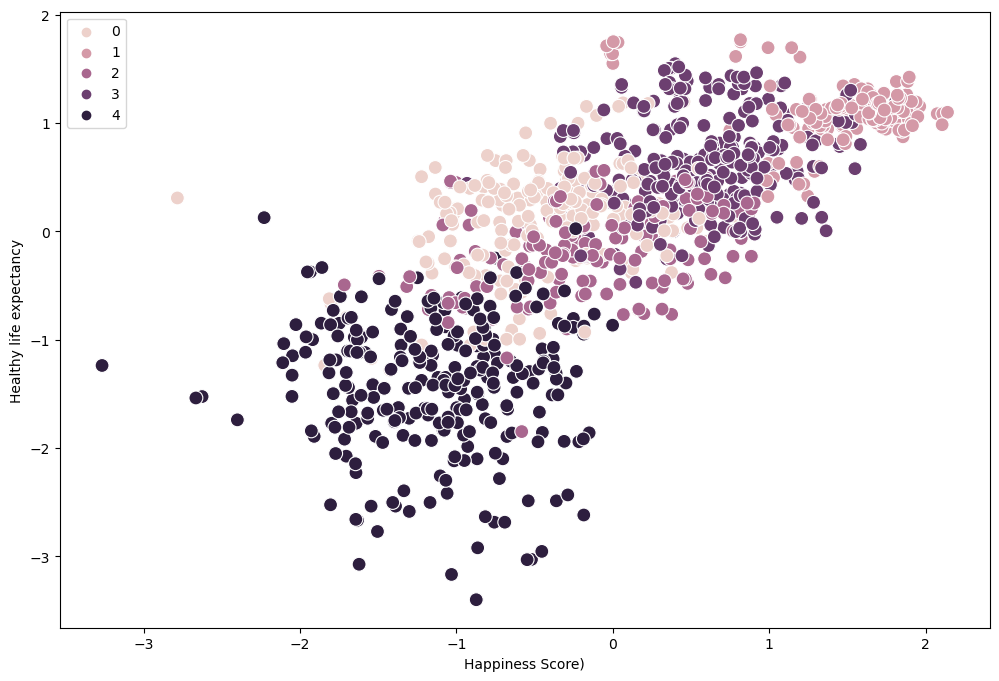

In [49]:
# Plot the clusters for the "Health (Life Expectancy)" and "Trust (Government Corruption)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num2['Happiness Score'], y=df_num2['Healthy life expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score)') # Label x-axis.
plt.ylabel('Healthy life expectancy') # Label y-axis.
plt.show()

#### Observation:
The cluster show us, that countrys with a low Health factor have a low Happiness score. There seems to be a slight correlation even though the black cluster has a lot of variance. 

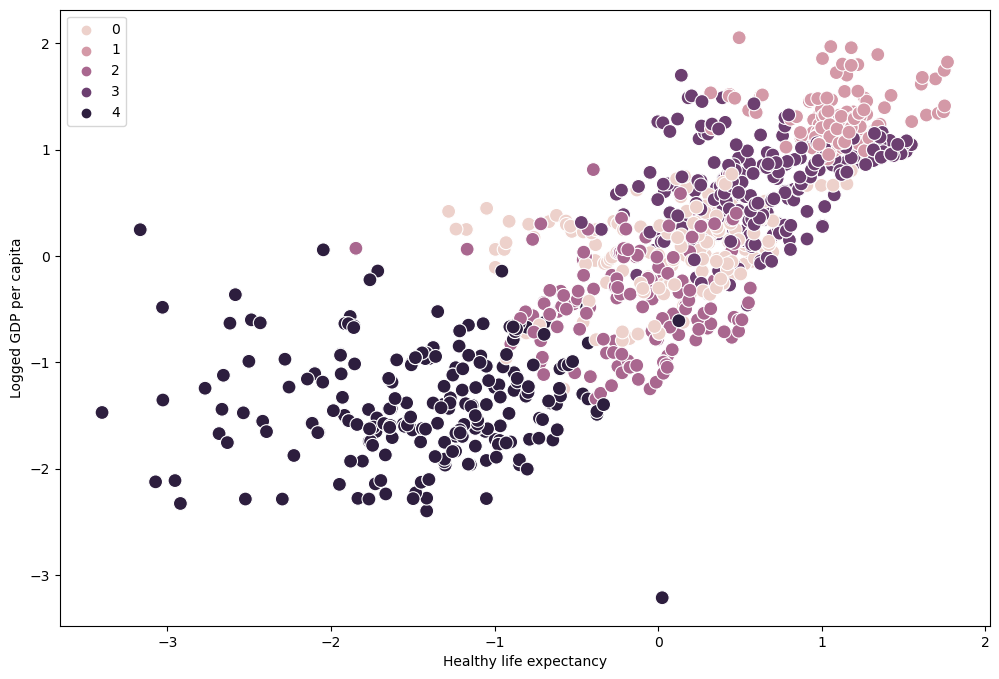

In [51]:
# Plot the clusters for the "Healthy life expectancy" and "Logged GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num2['Healthy life expectancy'], y=df_num2['Logged GDP per capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Healthy life expectancy') # Label x-axis.
plt.ylabel('Logged GDP per capita') # Label y-axis.
plt.show()

#### Observation:
The cluster shows us that there are indeed three cluster of countries that have a higher Health factor in correlation with a higehr GPD per Capita. However that doesn't relate too all countries. The black cluster has a lot of variance. 

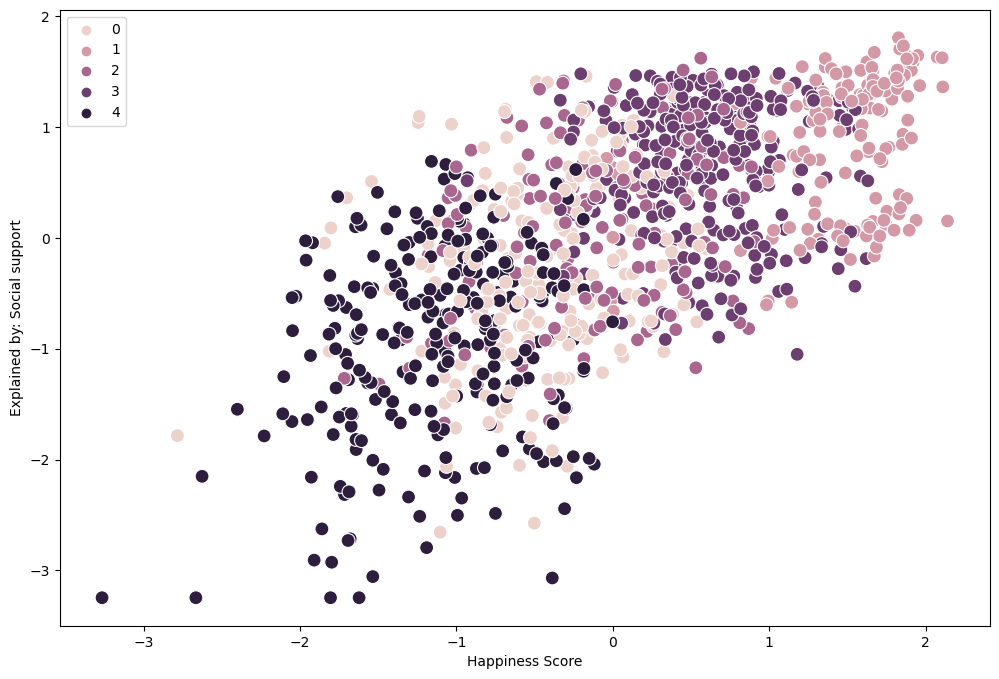

In [54]:
# Plot the clusters for the "Health (Life Expectancy)" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num2['Happiness Score'], y=df_num2['Explained by: Social support'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Explained by: Social support') # Label y-axis.
plt.show()

#### Observation:
The cluster shows us that there seems to be a slight correlation between the Happiness Score and the Social Support, especially for the rose cluster. However there is a lot of variance.

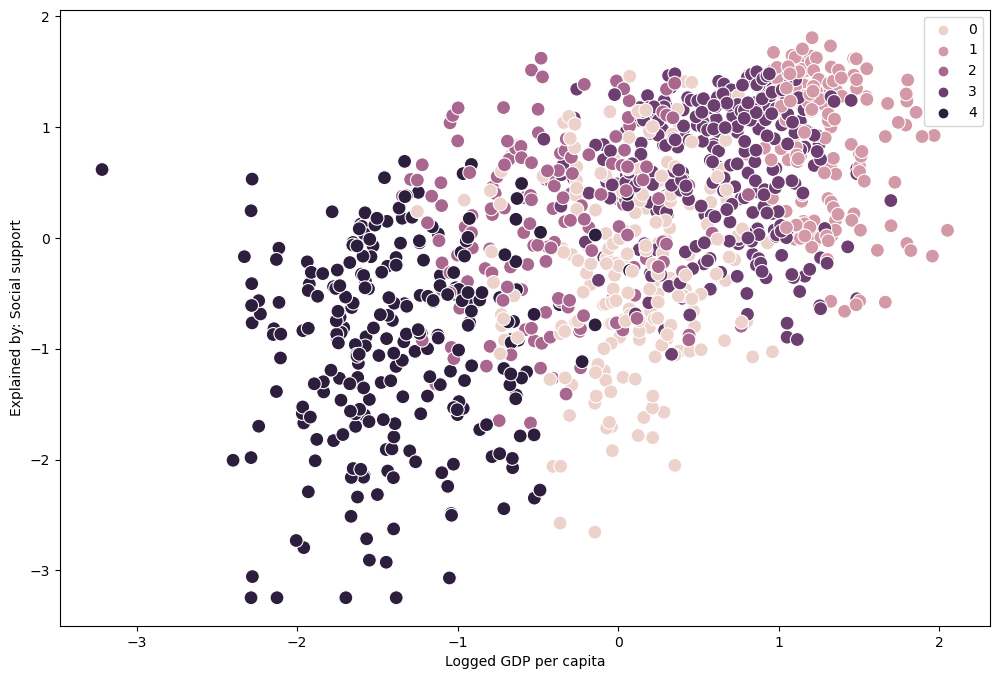

In [57]:
# Plot the clusters for the "Health (Life Expectancy)" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num2['Logged GDP per capita'], y=df_num2['Explained by: Social support'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Logged GDP per capita') # Label x-axis.
plt.ylabel('Explained by: Social support') # Label y-axis.
plt.show()

#### Observation:
There seems to be a slight correlation between social support and Logged GDP per capita as the social support increases with the Logged GDP per capita. However there is a lot of variance.

In [59]:
#Creating flags for diffent clusters and creating a column 'cluster'

df_num2.loc[df_num2['clusters'] == 4, 'cluster'] = 'black'
df_num2.loc[df_num2['clusters'] == 3, 'cluster'] = 'dark purple'
df_num2.loc[df_num2['clusters'] == 2, 'cluster'] = 'purple'
df_num2.loc[df_num2['clusters'] == 1, 'cluster'] = 'light purple'
df_num2.loc[df_num2['clusters'] == 0, 'cluster'] = 'pink'


/var/folders/q1/d0sf9cv50yb2q64wy681zzzh0000gn/T/ipykernel_5110/3628940376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num2.loc[df_num2['clusters'] == 4, 'cluster'] = 'black'


In [60]:
df_num2.isnull().sum()

Happiness Score                               0
Logged GDP per capita                         0
Healthy life expectancy                       0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
clusters                                      0
cluster                                       0
dtype: int64

In [61]:
#grouping by 'cluster' colors and calculating statistics

df_num2.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                         'Logged GDP per capita':['mean', 'median'], 
                         'Healthy life expectancy':['mean', 'median'],'Explained by: Generosity':['mean', 'median'],'Explained by: Perceptions of corruption':['mean', 'median'],
                          'Explained by: Log GDP per capita':['mean', 'median'],'Explained by: Freedom to make life choices':['mean', 'median'],
                          'Explained by: Social support':['mean', 'median'], 'Explained by: Healthy life expectancy':['mean', 'median']})

Happiness Score           Logged GDP per capita            \
                        mean    median                  mean    median   
cluster                                                                  
black              -1.125105 -1.071763             -1.373857 -1.434735   
dark purple         0.589534  0.586825              0.652743  0.693013   
light purple        1.472068  1.584707              1.296378  1.221379   
pink               -0.433019 -0.396331              0.086916  0.124912   
purple             -0.110587 -0.105680             -0.399750 -0.421678   

             Healthy life expectancy           Explained by: Generosity  \
                                mean    median                     mean   
cluster                                                                   
black                      -1.421820 -1.348131                 0.227052   
dark purple                 0.645762  0.595908                -0.535991   
light purple                1.104838  1.106561                 0.911131   
pink                        0.120313  0.208449                -0.654354   
purple                     -0.147243 -0.133123                 0.699441   

                       Explained by: Perceptions of corruption            \
                median                                    mean    median   
cluster                                                                    
black         0.110417                               -0.226865 -0.388369   
dark purple  -0.649146                               -0.301421 -0.422330   
light purple  0.758414                                1.806409  1.795548   
pink         -0.754899                               -0.471925 -0.600572   
purple        0.479060                               -0.264637 -0.423736   

             Explained by: Log GDP per capita            \
                                         mean    median   
cluster                                                   
black                               -1.311010 -1.430096   
dark purple                          0.537955  0.472790   
light purple                         1.072710  0.959775   
pink                                -0.056499 -0.059615   
purple                              -0.456962 -0.523213   

             Explained by: Freedom to make life choices            \
                                                   mean    median   
cluster                                                             
black                                         -0.594041 -0.438070   
dark purple                                    0.275379  0.292594   
light purple                                   1.018091  1.051880   
pink                                          -0.967635 -1.007353   
purple                                         0.636681  0.670237   

             Explained by: Social support            \
                                     mean    median   
cluster                                               
black                           -0.961891 -0.861565   
dark purple                      0.629105  0.766204   
light purple                     0.869116  1.058129   
pink                            -0.249922 -0.232146   
purple                           0.129854  0.236097   

             Explained by: Healthy life expectancy            
                                              mean    median  
cluster                                                       
black                                    -1.332129 -1.329062  
dark purple                               0.545587  0.604734  
light purple                              1.027214  1.107335  
pink                                      0.178775  0.209246  
purple                                   -0.135464 -0.070892

## Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
## Propose what these results could be useful for in future steps of an analytics pipeline.

All of the results are interessinting and show that especially the factors Logged GDP per capita and Healthy life expectancy have an impact on the happiness score. 

Against this background, it would be particularly interesting to see whether the clusters can correspond to a region and to what extent these correlations have changed over the years. Or whether they have remained constant only if we also include the historical and geographical reference, we can possibly dive even deeper into these relationships of the different factors. 

